# Import libraries

In [22]:
#pip install matplotlib
#pip install seaborn
#!pip install -U scikit-learn

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set()

# Import Customer Data

In [24]:
import pandas as pd
customers= pd.read_csv("Data/customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Feature Selection and analysis

Text(0, 0.5, 'Spending Score')

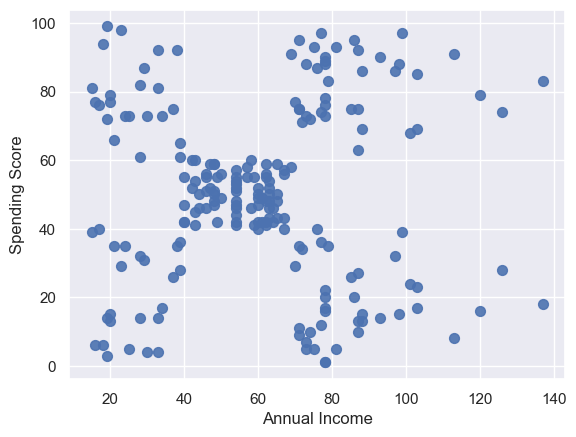

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
points = customers.iloc[:,3:5].values
x=points[:,0]
y=points[:,1]
plt.scatter(x,y,s=50,alpha=0.9)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

# Use K-Means Algorithm

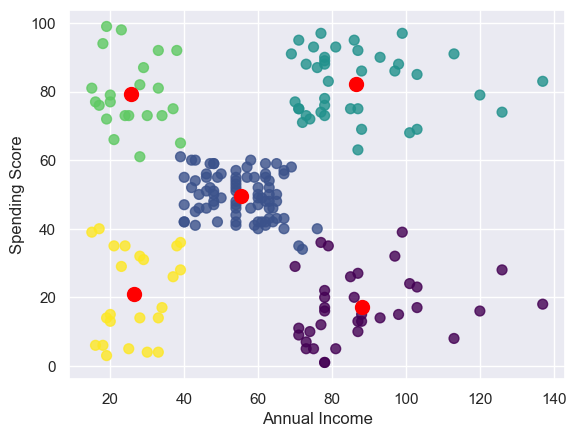

In [26]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5,random_state=0)
kmeans.fit(points)
predicted_cluster_indexes=kmeans.predict(points)

plt.scatter(x,y,c=predicted_cluster_indexes,s=50,alpha=0.8,cmap="viridis")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s=100)

# Add a cluster column in dataset

In [27]:
df= customers.copy()
df["Cluster"]= kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [28]:
import numpy as np

# Get the cluster index for a customer with a high income and low spending score
cluster = kmeans.predict(np.array([[120, 20]]))[0]

# Filter the DataFrame to include only customers in that cluster
clustered_df = df[df['Cluster'] == cluster]

# Show the customer IDs
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199], dtype=int64)

# Above array contains customers IDs with high income and low spending

# Lets find target customer using more than 2 dimensions

In [30]:
# Why label encoding? It' just becoj Machine learning can only deal with numerical data
from sklearn.preprocessing import LabelEncoder
df= customers.copy()
encoder=LabelEncoder()
df["Gender"]=encoder.fit_transform(df["Gender"])
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


# Extract the gender, age, annual income, and spending score columns. Then use the elbow method to determine the optimum number of clusters based on these features:

Text(0, 0.5, 'Inertias')

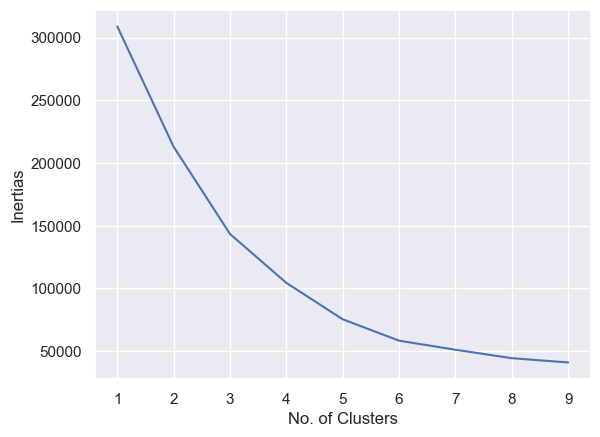

In [31]:
points = df.iloc[:,1:5].values  
inertias=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,10),inertias)
plt.xlabel("No. of Clusters")
plt.ylabel("Inertias")

In [32]:
inertias

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51132.70321257689,
 44392.115665679354,
 41000.874221320715]

In [33]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(points)
df["Cluster"]=kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [40]:
results = pd.DataFrame(columns=["Cluster","Average Age","Average Income","Average Spending Index","Number of Females","Number of Males"])
for i, center in enumerate(kmeans.cluster_centers_):
    age= center[1]
    income = center[2]
    spend= center[3]
    gdf=df[df["Cluster"]==i]
    females= gdf[gdf["Gender"]==0].shape[0]
    males= gdf[gdf["Gender"]==1].shape[0]
    results.loc[i]=(i,age,income,spend,females,males)
results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0


In [37]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])